## Simple Neural Networks

### Linearly Separable Data Sets

<img width="30%" class="imgright" src="../images/neural_network_egg.webp" srcset="../images/neural_network_egg_700w.webp 700w,../images/neural_network_egg_600w.webp 600w,../images/neural_network_egg_500w.webp 500w,../images/neural_network_egg_400w.webp 400w,../images/neural_network_egg_350w.webp 350w,../images/neural_network_egg_300w.webp 300w" alt="Neural Network on an Egg as a symbol for neural networks from scratch" />

As we have shown in the previous chapter of our tutorial on machine learning, a neural network consisting of only one perceptron was enough  to separate our example classes. Of course, we carefully designed these classes to make it work. There are many clusters of classes, for whichit will not work. We are going to have a look at some other examples and will discuss cases where it will not be possible to separate the classes.



Our classes have been linearly separable. **Linear separability** make sense in Euclidean geometry. Two sets of points (or classes) are called **linearly separable**, if at least one straight line in the plane exists so that all the points of one class are on one side of the line and all the points of the other class are on the other side.

More formally:

If two data clusters (classes) can be separated by a decision boundary in the form of a linear equation

$$\sum_{i=1}^{n} x_i \cdot w_i = 0$$

they are called linearly separable. 

Otherwise, i.e. if such a decision boundary does not exist, the two classes are called linearly inseparable. In this case, we cannot use a simple neural network.

### Perceptron for the AND Function

In our next example we will program a Neural Network in Python which implements the logical "And" function. It is defined for two inputs in the following way:

| Input1 | Input2 | Output |
|--------|:------:|-------:|
| 0 | 0 | 0|
| 0 | 1 | 0|
| 1 | 0 | 0|
| 1 | 1 | 1|

We learned in the previous chapter that a neural network with one perceptron and two input values can be interpreted as a decision boundary, i.e. straight line dividing two classes. The two classes we want to classify in our example look like this:

[]

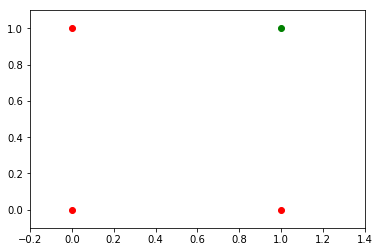

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
#ax.plot(X, m * X + 1.2, label="decision boundary")
plt.plot()

We also found out that such a primitive neural network is only capable of creating straight lines going through the origin. So dividing lines like this:



[]

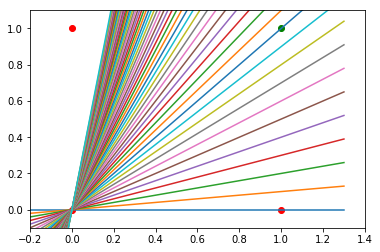

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
for m in np.arange(0, 6, 0.1):
    ax.plot(X, m * X )
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
plt.plot()

We can see that none of these straight lines can be used as decision boundary nor any other lines going through the origin.

We need a line 
$$y = m \cdot x + c$$
where the intercept ```c``` is not equal to 0.

For example the line 

$$y = -x + 1.2$$

could be used as a separating line for our problem:



[]

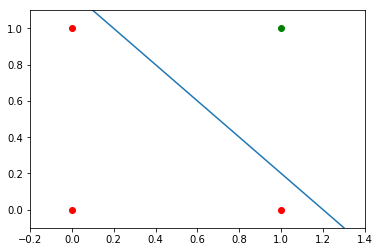

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m, c = -1, 1.2
ax.plot(X, m * X + c )
plt.plot()

The question now is whether we can find a solution with minor modifications of our network model? Or in other words: Can we create a perceptron capable of defining arbitrary decision boundaries?

The solution consists in the addition of a bias node.

#### Single Perceptron with a Bias

A perceptron with two input values and a bias corresponds to a general straight line. With the aid of the bias value ```b``` we can train the perceptron to determine a decision boundary with a non zero intercept ```c```. 



<img width="60%" src="../images/perceptron_two_inputs_and_bias.webp" srcset="../images/perceptron_two_inputs_and_bias_800w.webp 800w,../images/perceptron_two_inputs_and_bias_700w.webp 700w,../images/perceptron_two_inputs_and_bias_600w.webp 600w,../images/perceptron_two_inputs_and_bias_500w.webp 500w,../images/perceptron_two_inputs_and_bias_400w.webp 400w,../images/perceptron_two_inputs_and_bias_350w.webp 350w,../images/perceptron_two_inputs_and_bias_300w.webp 300w" alt="A perceptron with two input values and a bias value" />


While the input values can change, a bias value always remains constant. Only the weight of the bias node can be adapted.

Now, the linear equation for a perceptron contains a bias:

$$\sum_{i=1}^{n} w_i \cdot x_i + w_{n+1} \cdot b = 0$$

In our case it looks like this:

$$w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot b= 0$$

this is equivalent with

$$ x_2 = -\frac{w_1}{w_2} \cdot x_1 - \frac{w_3}{w_2} \cdot b$$

This means:

$$m = -\frac{w_1}{w_2}$$

and

$$c = - \frac{w_3}{w_2} \cdot b$$  

In [4]:
%%capture
%%writefile perceptrons.py
 
import numpy as np
from collections import Counter

class Perceptron:
    
    def __init__(self, 
                 weights,
                 bias=1,
                 learning_rate=0.3):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
        self.bias = bias
        self.learning_rate = learning_rate
        
    @staticmethod
    def unit_step_function(x):
        if  x <= 0:
            return 0
        else:
            return 1
        
    def __call__(self, in_data):
        in_data = np.concatenate( (in_data, [self.bias]) )
        result = self.weights @ in_data
        return Perceptron.unit_step_function(result)
    
    def adjust(self, 
               target_result, 
               in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)  # 
        calculated_result = self(in_data)
        error = target_result - calculated_result
        if error != 0:
            in_data = np.concatenate( (in_data, [self.bias]) )
            correction = error * in_data * self.learning_rate
            self.weights += correction
            
    def evaluate(self, data, labels):
        evaluation = Counter()
        for sample, label in zip(data, labels):
            result = self(sample) # predict
            if result == label:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation

We assume that the above Python code with the Perceptron class is stored in your current working directory under the name 'perceptrons.py'.

In [5]:
import numpy as np
from perceptrons import Perceptron

def labelled_samples(n):
    for _ in range(n):
        s = np.random.randint(0, 2, (2,))
        yield (s, 1) if s[0] == 1 and s[1] == 1 else (s, 0)

p = Perceptron(weights=[0.3, 0.3, 0.3],
               learning_rate=0.2)

for in_data, label in labelled_samples(30):
    p.adjust(label, 
             in_data)

test_data, test_labels = list(zip(*labelled_samples(30)))

evaluation = p.evaluate(test_data, test_labels)
print(evaluation)

Counter({'correct': 30})


-3.0000000000000004 3.0000000000000013


[]

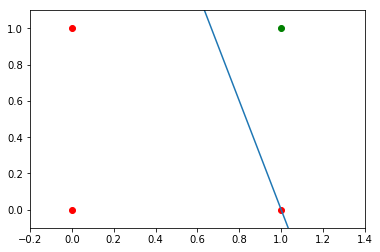

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()

We will create another example with linearly separable data sets, which need a bias node to be separable. We will use the ```make_blobs``` function from ```sklearn.datasets```:

In [7]:
from sklearn.datasets import make_blobs

n_samples = 250
samples, labels = make_blobs(n_samples=n_samples, 
                             centers=([2.5, 3], [6.7, 7.9]), 
                             random_state=0)


Let us visualize the previously created data:

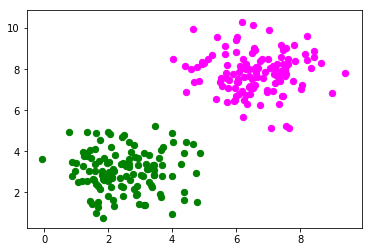

In [8]:
import matplotlib.pyplot as plt

colours = ('green', 'magenta', 'blue', 'cyan', 'yellow', 'red')
fig, ax = plt.subplots()


for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1], 
               c=colours[n_class], s=40, label=str(n_class))

In [9]:
n_learn_data = int(n_samples * 0.8) # 80 % of available data points
learn_data, test_data = samples[:n_learn_data], samples[-n_learn_data:]
learn_labels, test_labels = labels[:n_learn_data], labels[-n_learn_data:]

from perceptrons import Perceptron

p = Perceptron(weights=[0.3, 0.3, 0.3],
               learning_rate=0.8)

for sample, label in zip(learn_data, learn_labels):
    p.adjust(label,
             sample)

evaluation = p.evaluate(learn_data, learn_labels)
print(evaluation)

Counter({'correct': 200})


Let us visualize the decision boundary:

-1.5513529034664024 11.736643489707035


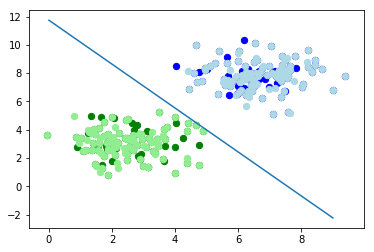

In [10]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

# plotting learn data
colours = ('green', 'blue')
for n_class in range(2):
    ax.scatter(learn_data[learn_labels==n_class][:, 0], 
               learn_data[learn_labels==n_class][:, 1], 
               c=colours[n_class], s=40, label=str(n_class))
    
# plotting test data
colours = ('lightgreen', 'lightblue')
for n_class in range(2):
    ax.scatter(test_data[test_labels==n_class][:, 0], 
               test_data[test_labels==n_class][:, 1], 
               c=colours[n_class], s=40, label=str(n_class))


    
X = np.arange(np.max(samples[:,0]))
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()
plt.show()


In the following section, we will introduce the XOR problem for neural networks. It is the simplest example of a non  linearly separable neural network. It can be solved with an additional layer of neurons, which is called a hidden layer.


### The XOR Problem for Neural Networks

The XOR (exclusive or) function is defined by the following truth table:


| Input1 | Input2 | XOR Output |
|--------|:------:|-------:|
| 0 | 0 | 0|
| 0 | 1 | 1|
| 1 | 0 | 1|
| 1 | 1 | 0|


This problem can't be solved with a simple neural network, as we can see in the following diagram:

<img width="30%" src="../images/xor_problem_1.webp" srcset="../images/xor_problem_1_600w.webp 600w,../images/xor_problem_1_500w.webp 500w,../images/xor_problem_1_400w.webp 400w,../images/xor_problem_1_350w.webp 350w,../images/xor_problem_1_300w.webp 300w" alt="XOR problem points in plane" />

No matter which straight line you choose, you will never succeed in having the blue points on one side and the orange points on the other side. This is shown in the following figure. The orange points are on the orange line. This means that this cannot be a dividing line. If we move this line parallel - no matter which direction, there will be always two orange and one blue point on one side and only one blue point on the other side. If we move the orange line in a non parallel way, there will be one blue and one orange point on either side, except if the line goes through an orange point. So there is no way for a single straight line separating those points.

<img width="35%" src="../images/xor_problem_2.webp" srcset="../images/xor_problem_2_700w.webp 700w,../images/xor_problem_2_600w.webp 600w,../images/xor_problem_2_500w.webp 500w,../images/xor_problem_2_400w.webp 400w,../images/xor_problem_2_350w.webp 350w,../images/xor_problem_2_300w.webp 300w" alt="XOR problem no single decision boundary" />


To solve this problem, we need to introduce a new type of neural networks, a network with so-called hidden layers. A hidden layer allows the network to reorganize or rearrange the input data. 

<img width="45%" src="../images/simple_ANN_with_hidden_layer.webp" srcset="../images/simple_ANN_with_hidden_layer_800w.webp 800w,../images/simple_ANN_with_hidden_layer_700w.webp 700w,../images/simple_ANN_with_hidden_layer_600w.webp 600w,../images/simple_ANN_with_hidden_layer_500w.webp 500w,../images/simple_ANN_with_hidden_layer_400w.webp 400w,../images/simple_ANN_with_hidden_layer_350w.webp 350w,../images/simple_ANN_with_hidden_layer_300w.webp 300w" alt="Simple artificial network with hidden layers" />

We will need only one hidden layer with two neurons. One works like an AND gate and the other one like an OR gate. 
The output will "fire", when the OR gate fires and the AND gate doesn't. 



As we had already mentioned, we cannot find a line which separates the orange points from the blue points. But they can be separated by two lines, e.g. L<sub>1</sub> and L<sub>2</sub> in the following diagram:

<img width="35%" src="../images/xor_problem_3.webp" srcset="../images/xor_problem_3_800w.webp 800w,../images/xor_problem_3_700w.webp 700w,../images/xor_problem_3_600w.webp 600w,../images/xor_problem_3_500w.webp 500w,../images/xor_problem_3_400w.webp 400w,../images/xor_problem_3_350w.webp 350w,../images/xor_problem_3_300w.webp 300w" alt="XOR problem in neural networks" />


To solve this problem, we need a network of the following kind, i.e with a hidden layer N<sub>1</sub> and N<sub>2</sub>

<img width="19%" src="../images/xor_problem_solution1.webp" srcset="../images/xor_problem_solution1_600w.webp 600w,../images/xor_problem_solution1_500w.webp 500w,../images/xor_problem_solution1_400w.webp 400w,../images/xor_problem_solution1_350w.webp 350w,../images/xor_problem_solution1_300w.webp 300w" alt="network solving the xor problem" />

The neuron N<sub>1</sub> will determine one line, e.g. L<sub>1</sub> and the neuron N<sub>2</sub> will determine the other line L<sub>2</sub>.
N<sub>3</sub> will finally solve our problem:

<img width="60%" src="../images/xor_problem_solution2.webp" srcset="../images/xor_problem_solution2_500w.webp 500w,../images/xor_problem_solution2_400w.webp 400w,../images/xor_problem_solution2_350w.webp 350w,../images/xor_problem_solution2_300w.webp 300w" alt="Explaining the network solving the xor problem" />

The implementation of this in Python has to wait until the next chapter of our tutorial on machine learning.

### Exercises

#### Exercise 1

We could extend the logical AND to float values between 0 and 1 in the following way:
    
 

<table>
<thead><tr>
<th>Input1</th>
<th style="text-align:center">Input2</th>
<th style="text-align:right">Output</th>
</tr>
</thead>
<tbody>
<tr>
<td>x1 &lt; 0.5</td>
<td style="text-align:center">x2 &lt; 0.5</td>
<td style="text-align:right">0</td>
</tr>
<tr>
<td>x1 &lt; 0.5</td>
<td style="text-align:center">x2 &gt;= 0.5</td>
<td style="text-align:right">0</td>
</tr>
<tr>
<td>x1 &gt;= 0.5</td>
<td style="text-align:center">x2 &lt; 0.5</td>
<td style="text-align:right">0</td>
</tr>
<tr>
<td>x1 &gt;= 0.5</td>
<td style="text-align:center">x2 &gt;= 0.5</td>
<td style="text-align:right">1</td>
</tr>
</tbody>
</table>
    
Try to train a neural network with only one perceptron. Why doesn't it work?

#### Exercise 2
A point belongs to a class 0, if $x_1 < 0.5$ and belongs to class 1, if  $x_1 >= 0.5$. Train a network with one perceptron to classify arbitrary points. What can you say about the dicision boundary? What about the input values $x_2$  


### Solutions to the exercises

#### Solution to the 1. Exercise

In [17]:
from perceptrons import Perceptron

p = Perceptron(weights=[0.3, 0.3, 0.3],
               bias=1,
               learning_rate=0.2)

def labelled_samples(n):
    for _ in range(n):
        s = np.random.random((2,))
        yield (s, 1) if s[0] >= 0.5 and s[1] >= 0.5 else (s, 0)

for in_data, label in labelled_samples(30):
    p.adjust(label, 
             in_data)

test_data, test_labels = list(zip(*labelled_samples(60)))

evaluation = p.evaluate(test_data, test_labels)
print(evaluation)

Counter({'correct': 32, 'wrong': 28})


The easiest way to see, why it doesn't work, is to visualize the data.

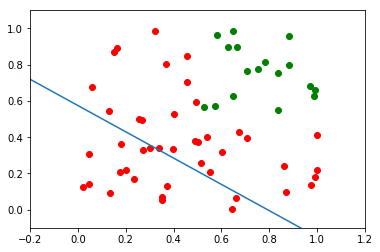

In [18]:
import matplotlib.pyplot as plt
import numpy as np

ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zeroes = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 0]

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
X, Y = list(zip(*ones))
ax.scatter(X, Y, color="g")
X, Y = list(zip(*zeroes))
ax.scatter(X, Y, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
c = -p.weights[2] / p.weights[1]
m = -p.weights[0] / p.weights[1]
X = np.arange(xmin, xmax, 0.1)
ax.plot(X, m * X + c, label="decision boundary")

We can see that the green points and the red points are not separable by one straight line. 

#### Solution to the 2nd Exercise

In [19]:
from perceptrons import Perceptron

import numpy as np
from collections import Counter

def labelled_samples(n):
    for _ in range(n):
        s = np.random.random((2,))
        yield (s, 0) if s[0] < 0.5 else (s, 1)


p = Perceptron(weights=[0.3, 0.3, 0.3],
               learning_rate=0.4)

for in_data, label in labelled_samples(300):
    p.adjust(label, 
             in_data)

test_data, test_labels = list(zip(*labelled_samples(500)))

print(p.weights)
p.evaluate(test_data, test_labels)

[ 2.03831116 -0.1785671  -0.9       ]


Counter({'correct': 489, 'wrong': 11})

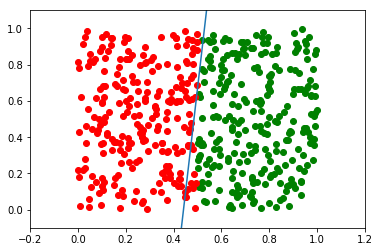

In [20]:
import matplotlib.pyplot as plt
import numpy as np

ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zeroes = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 0]

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
X, Y = list(zip(*ones))
ax.scatter(X, Y, color="g")
X, Y = list(zip(*zeroes))
ax.scatter(X, Y, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
c = -p.weights[2] / p.weights[1]
m = -p.weights[0] / p.weights[1]
X = np.arange(xmin, xmax, 0.1)
ax.plot(X, m * X + c, label="decision boundary")

In [21]:
p.weights, m

(array([ 2.03831116, -0.1785671 , -0.9       ]), 11.414819026425487)

The slope ```m``` will have to get larger and larger in situations like this. 